# Set up google drive for saving process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set up working directory in Google Drive

In [ ]:

import os
BASE_DIR = '/content/drive/MyDrive/traffic_sign_detection'
os.makedirs(BASE_DIR, exist_ok=True)

# Install required packages

In [ ]:
# Install required packages
!pip install ultralytics
!pip install roboflow
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 12.0 MB/s eta 0:00:00


# Import packages

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Download the dataset and save in google drive (if it alredy in google drive so dont run )

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="WqwaLkeWqQ4M7yQN66A8")
project = rf.workspace("traffic-sign-dr7ed").project("traffic-sign-an3gb")
version = project.version(6)
dataset = version.download("yolov8", location=f"{BASE_DIR}/dataset")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/drive/MyDrive/traffic_sign_detection/dataset in yolov8:: 100%|██████████| 8256/8256 [01:22<00:00, 99.91it/s] 


# Display random sample images from the dataset

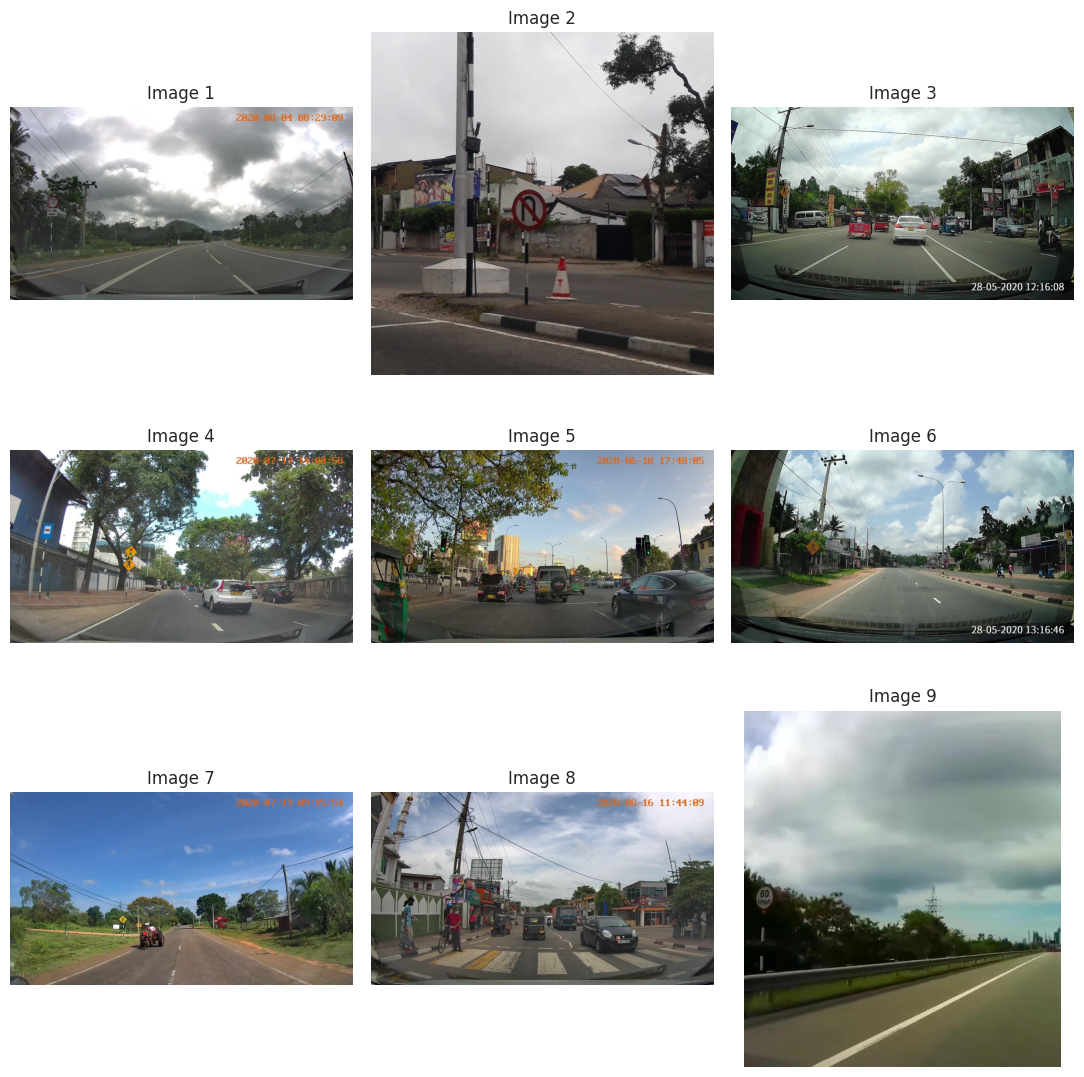

In [ ]:
# Set the path to the images directory
image_dir = "/content/drive/MyDrive/traffic_sign_detection/dataset/train/images/"

# Check if image directory exists
if not os.path.exists(image_dir):
    print("Image directory not found:", image_dir)
else:
    # Display random images
    num_samples = 9
    image_files = os.listdir(image_dir)
    if len(image_files) < num_samples:
        print(f"Only {len(image_files)} images found, displaying all.")
        num_samples = len(image_files)

    rand_images = random.sample(image_files, num_samples)

    # Plot the images
    fig, axes = plt.subplots(3, 3, figsize=(11, 11))
    for i in range(num_samples):
        image = rand_images[i]
        ax = axes[i // 3, i % 3]
        ax.imshow(plt.imread(os.path.join(image_dir, image)))
        ax.set_title(f'Image {i + 1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# Load the pre tranned model

In [ ]:

# Define the target path for the YOLOv8n model in Google Drive
pretrained_model_path = os.path.join(BASE_DIR, 'yolov8n.pt')

# Load and prepare the model
if not os.path.exists(pretrained_model_path):
    print("Downloading YOLOv8n pretrained model...")
    model = YOLO('yolov8n.pt')  # This downloads the pretrained model locally
    # Move the model to the Google Drive directory
    local_model_path = 'yolov8n.pt'  # Default download location
    if os.path.exists(local_model_path):
        import shutil
        shutil.move(local_model_path, pretrained_model_path)
        print(f"YOLOv8n pretrained model saved to: {pretrained_model_path}")
    else:
        print("Failed to download YOLOv8n pretrained model.")
else:
    print(f"YOLOv8n pretrained model already exists at: {pretrained_model_path}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]


YOLOv8n pretrained model saved to: /content/drive/MyDrive/traffic_sign_detection/yolov8n.pt


# Train the model ( dont train the model if it tranned before)

In [ ]:
from ultralytics import YOLO


# Train the model
Result_Final_model = model.train(
    data="/content/drive/MyDrive/traffic_sign_detection/dataset/data.yaml",  # Path to your data.yaml
    epochs=50,  # Adjust based on dataset size
    batch=16,  # Adjust based on GPU VRAM
    imgsz=640,  # Image size
    optimizer='auto',  # Default optimizer
    lr0=0.001,  # Initial learning rate
    patience=10,  # Early stopping patience
    project='/content/drive/MyDrive/traffic_sign_detection/runs',  # Save path
    name='final_model',  # Run name
    augment=True  # Enable data augmentation
)


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/traffic_sign_detection/dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/traffic_sign_detection/runs, name=final_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]


Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/traffic_sign_detection/dataset/train/labels... 3166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3166/3166 [01:03<00:00, 49.98it/s] 


train: New cache created: /content/drive/MyDrive/traffic_sign_detection/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 135, len(boxes) = 3373. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/traffic_sign_detection/dataset/valid/labels... 97 images, 0 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:01<00:00, 54.76it/s]


val: New cache created: /content/drive/MyDrive/traffic_sign_detection/dataset/valid/labels.cache
Plotting labels to /content/drive/MyDrive/traffic_sign_detection/runs/final_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/traffic_sign_detection/runs/final_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G      1.186      5.055     0.9592         21        640: 100%|██████████| 198/198 [01:50<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all         97        104      0.489      0.563       0.42      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.28G      1.074      3.403     0.9239         24        640: 100%|██████████| 198/198 [01:50<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all         97        104      0.464      0.607      0.473      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G      1.016      2.767     0.9149         39        640: 100%|██████████| 198/198 [01:48<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all         97        104       0.51      0.764       0.67      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G      1.002      2.376     0.9134         23        640: 100%|██████████| 198/198 [01:50<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         97        104      0.542      0.859      0.731        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.2G     0.9738      2.086     0.9075         37        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all         97        104       0.51      0.935      0.692      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G     0.9395      1.824     0.9011         23        640: 100%|██████████| 198/198 [01:48<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


                   all         97        104      0.553      0.916      0.713       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.2G     0.9258      1.648     0.8947         21        640: 100%|██████████| 198/198 [01:55<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all         97        104      0.572      0.886      0.696      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.21G     0.9096      1.523     0.8968         31        640: 100%|██████████| 198/198 [01:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all         97        104      0.594      0.898      0.708      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.21G      0.889      1.395     0.8909         20        640: 100%|██████████| 198/198 [01:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all         97        104      0.693      0.824      0.795      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G     0.8841      1.322     0.8934         29        640: 100%|██████████| 198/198 [01:48<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


                   all         97        104      0.622      0.781      0.772      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.2G     0.8528      1.224     0.8835         21        640: 100%|██████████| 198/198 [01:47<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


                   all         97        104      0.622      0.869      0.814      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.21G      0.848      1.173     0.8783         25        640: 100%|██████████| 198/198 [01:48<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all         97        104      0.703      0.868       0.84        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G      0.846      1.129     0.8842         28        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all         97        104      0.718      0.813      0.808      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.2G     0.8366       1.08     0.8764         22        640: 100%|██████████| 198/198 [01:48<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         97        104      0.648      0.862      0.803      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.2G     0.8295      1.033      0.877         28        640: 100%|██████████| 198/198 [01:48<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all         97        104       0.78      0.874       0.85      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.21G     0.8152     0.9985     0.8717         26        640: 100%|██████████| 198/198 [01:47<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all         97        104      0.841      0.829      0.851      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.2G     0.8188     0.9679     0.8694         27        640: 100%|██████████| 198/198 [01:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         97        104       0.73      0.904      0.827      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G     0.8037     0.9336     0.8668         27        640: 100%|██████████| 198/198 [01:44<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all         97        104      0.711       0.94      0.829      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G      0.802     0.9246     0.8665         19        640: 100%|██████████| 198/198 [01:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all         97        104      0.652      0.854        0.8      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.21G     0.7855     0.8889     0.8652         21        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all         97        104      0.634      0.847      0.799      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.2G     0.7958     0.8665     0.8694         24        640: 100%|██████████| 198/198 [01:49<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         97        104      0.701       0.87      0.844      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.21G     0.7903      0.871     0.8651         22        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all         97        104      0.686      0.959      0.825      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.7669     0.8176     0.8661         21        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all         97        104      0.777      0.849      0.835       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G     0.7821     0.8332     0.8576         25        640: 100%|██████████| 198/198 [01:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all         97        104      0.638      0.931       0.83      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G     0.7682     0.8031     0.8623         24        640: 100%|██████████| 198/198 [01:47<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         97        104      0.812      0.864       0.83      0.703
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



25 epochs completed in 0.779 hours.
Optimizer stripped from /content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


                   all         97        104      0.752      0.874      0.841      0.714
Children Crossing Ahead          5          5      0.486          1      0.606      0.396
Level Crossing with Gates Ahead         36         36      0.971      0.972      0.981      0.821
          No Left Turn         25         25       0.61       0.96      0.648      0.546
         No Right Turn         17         17      0.749     0.0588      0.514      0.405
             No U-turn          2          2      0.453          1      0.995      0.896
    Road Narrows Ahead          4          4      0.918          1      0.995      0.909
    Speed Limit 60km-h         13         13      0.855          1      0.995      0.844
    Speed Limit 70km-h          2          2      0.975          1      0.995      0.896
Speed: 0.2ms preprocess, 22.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/drive/MyDrive/traffic_sign_detection/runs/final_model


# model save and validate

In [ ]:
# Save model with highest accuracy
Valid_model = YOLO('/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt')

# Evaluate the model on the validation set
metrics = Valid_model.val(split='val')

# Print the results
print("/n")
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]
val: Scanning /content/drive/MyDrive/traffic_sign_detection/dataset/valid/labels... 97 images, 0 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:00<00:00, 110.03it/s]


val: New cache created: /content/drive/MyDrive/traffic_sign_detection/dataset/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all         97        104      0.779      0.874       0.85      0.711
Children Crossing Ahead          5          5       0.54          1      0.655      0.369
Level Crossing with Gates Ahead         36         36      0.993      0.972      0.983      0.815
          No Left Turn         25         25      0.612       0.96      0.612      0.516
         No Right Turn         17         17      0.767     0.0588      0.572      0.453
             No U-turn          2          2      0.576          1      0.995      0.896
    Road Narrows Ahead          4          4      0.924          1      0.995      0.895
    Speed Limit 60km-h         13         13      0.855          1      0.995      0.845
    Speed Limit 70km-h          2          2      0.966          1      0.995      0.895
Speed: 3.1ms preprocess, 9.8ms inference, 0.0ms loss, 14.9ms postprocess per image
Results saved to runs/detect/val
/n
precision(B):  0.7790337511956111
metrics/recall(B):  0.87388071895424

# Generate confusion matrix

In [ ]:
from ultralytics import YOLO

# Load the trained model
model_path = '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt'
model = YOLO(model_path)

# Perform validation to generate the confusion matrix
results = model.val(data='/content/drive/MyDrive/traffic_sign_detection/dataset/data.yaml', split='val')
print("Confusion matrix generated in:", results.save_dir)


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/traffic_sign_detection/dataset/valid/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all         97        104      0.779      0.874       0.85      0.711
Children Crossing Ahead          5          5       0.54          1      0.655      0.369
Level Crossing with Gates Ahead         36         36      0.993      0.972      0.983      0.815
          No Left Turn         25         25      0.612       0.96      0.612      0.516
         No Right Turn         17         17      0.767     0.0588      0.572      0.453
             No U-turn          2          2      0.576          1      0.995      0.896
    Road Narrows Ahead          4          4      0.924          1      0.995      0.895
    Speed Limit 60km-h         13         13      0.855          1      0.995      0.845
    Speed Limit 70km-h          2          2      0.966          1      0.995      0.895
Speed: 7.4ms preprocess, 5.8ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val2
Confusion matrix generated in: runs/detect/val2


# Confusion matrix visualize

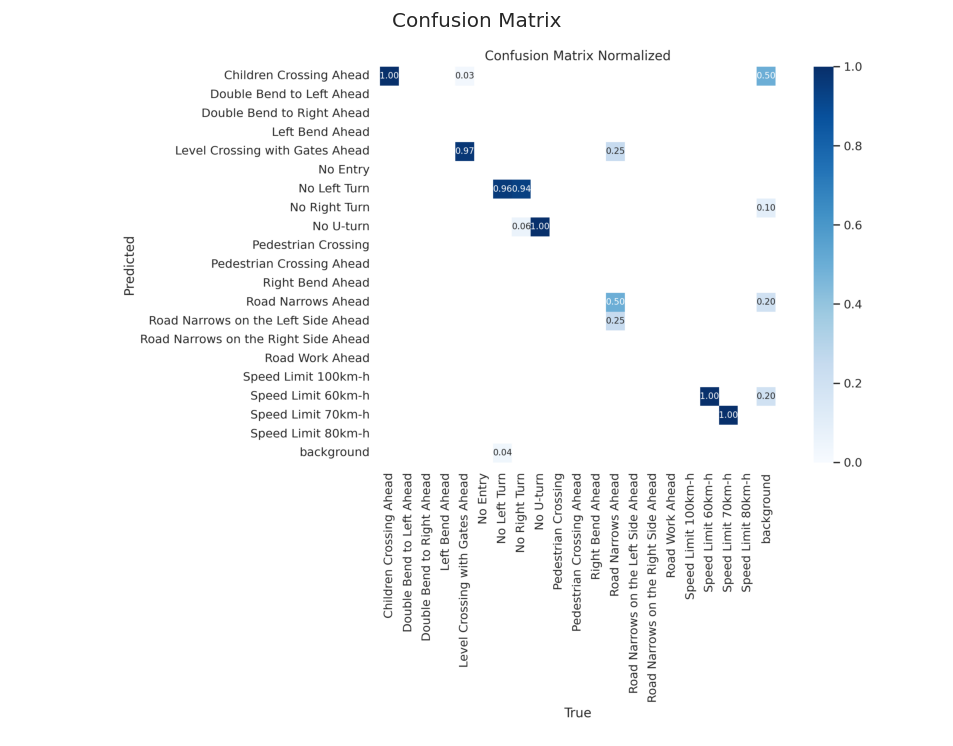

Confusion matrix loaded from: runs/detect/val2/confusion_matrix_normalized.png


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import glob

# Dynamically find the most recent YOLO output directory
output_base_dir = "runs/detect"  # Update this base directory if needed
output_dirs = glob.glob(f"{output_base_dir}/*")  # Get all subdirectories

if not output_dirs:
    raise FileNotFoundError(f"No YOLO output directories found in: {output_base_dir}")

# Get the most recent output directory
default_output_dir = max(output_dirs, key=os.path.getmtime)
confusion_matrix_path = os.path.join(default_output_dir, "confusion_matrix_normalized.png")

# Verify the confusion matrix file exists
if not os.path.exists(confusion_matrix_path):
    raise FileNotFoundError(f"Confusion matrix not found in: {confusion_matrix_path}")

# Load the confusion matrix image
img = cv2.imread(confusion_matrix_path)
if img is None:
    raise ValueError("Image could not be loaded. Check file format.")

# Convert BGR to RGB for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the confusion matrix
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix")
plt.show()

print(f"Confusion matrix loaded from: {confusion_matrix_path}")


# Accurace(precision ) curve and loss curve

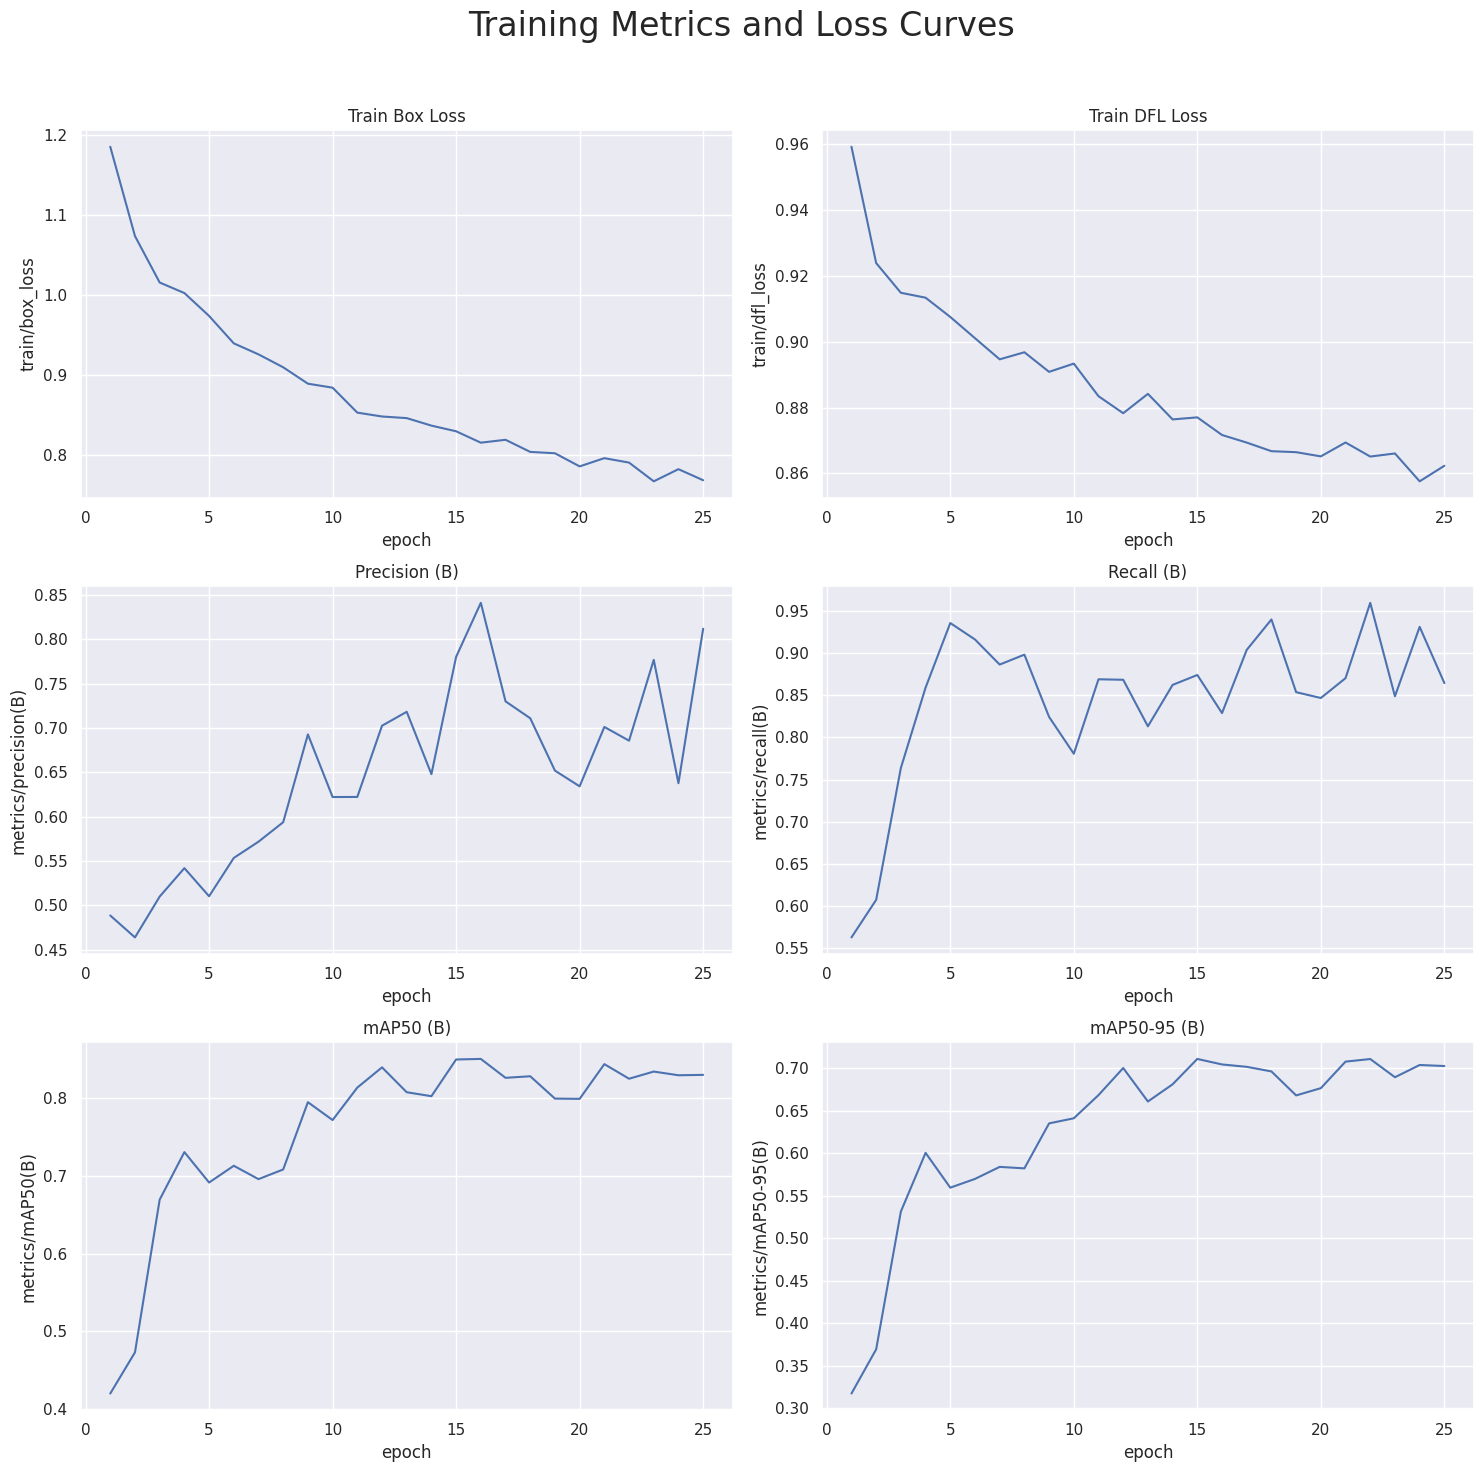

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results.csv file
results_path = '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/results.csv'
results = pd.read_csv(results_path)

# Clean column names
results.columns = results.columns.str.strip()

# Plot accuracy and loss curves
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Loss curves
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[0, 1])

# Accuracy curves
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[2, 1])

# Titles for plots
axs[0, 0].set(title='Train Box Loss')
axs[0, 1].set(title='Train DFL Loss')
axs[1, 0].set(title='Precision (B)')
axs[1, 1].set(title='Recall (B)')
axs[2, 0].set(title='mAP50 (B)')
axs[2, 1].set(title='mAP50-95 (B)')

plt.suptitle('Training Metrics and Loss Curves', fontsize=24)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Test with test images

In [ ]:
from ultralytics import YOLO

# Load the trained model
model_path = '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt'
model = YOLO(model_path)

# Evaluate the model on the test dataset
results = model.val(data="/content/drive/MyDrive/traffic_sign_detection/dataset/data.yaml", split='test')  # Specify test split

# Print the evaluation metrics
print(f"Precision: {results.results_dict['metrics/precision(B)']:.2f}")
print(f"Recall: {results.results_dict['metrics/recall(B)']:.2f}")
print(f"mAP@50: {results.results_dict['metrics/mAP50(B)']:.2f}")
print(f"mAP@50-95: {results.results_dict['metrics/mAP50-95(B)']:.2f}")


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/traffic_sign_detection/dataset/test/labels... 859 images, 0 backgrounds, 0 corrupt: 100%|██████████| 859/859 [00:13<00:00, 65.55it/s] 


val: New cache created: /content/drive/MyDrive/traffic_sign_detection/dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:20<00:00,  2.58it/s]


                   all        859        908      0.622      0.672       0.66      0.526
Children Crossing Ahead         61         63      0.669       0.81      0.803      0.681
Double Bend to Left Ahead         39         39      0.576      0.905      0.844      0.746
Double Bend to Right Ahead         47         47      0.656      0.894      0.876      0.748
       Left Bend Ahead         73         73      0.768       0.74      0.875      0.768
Level Crossing with Gates Ahead         10         10      0.854          1      0.995      0.793
              No Entry         21         21      0.518      0.619      0.615       0.49
          No Left Turn         33         34      0.464      0.765      0.529      0.437
         No Right Turn         44         45      0.731      0.333      0.464       0.31
             No U-turn         37         37      0.629      0.622      0.612      0.489
   Pedestrian Crossing        119        137       0.83      0.467      0.526      0.344
Pede

# View tested images as batches

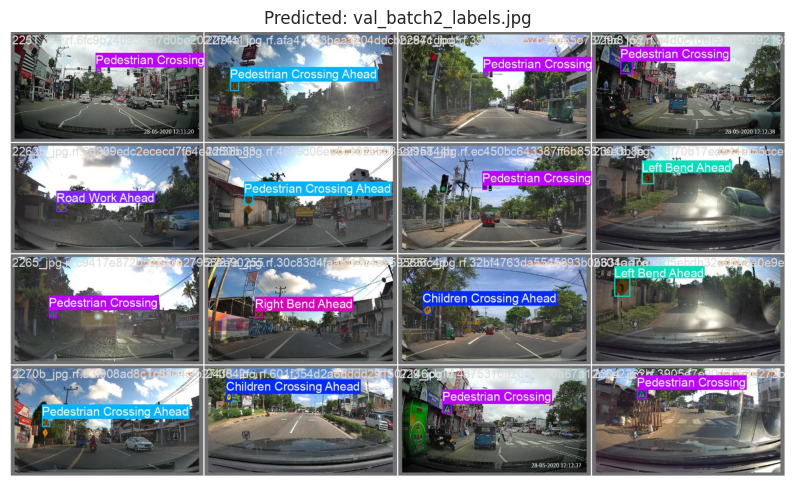

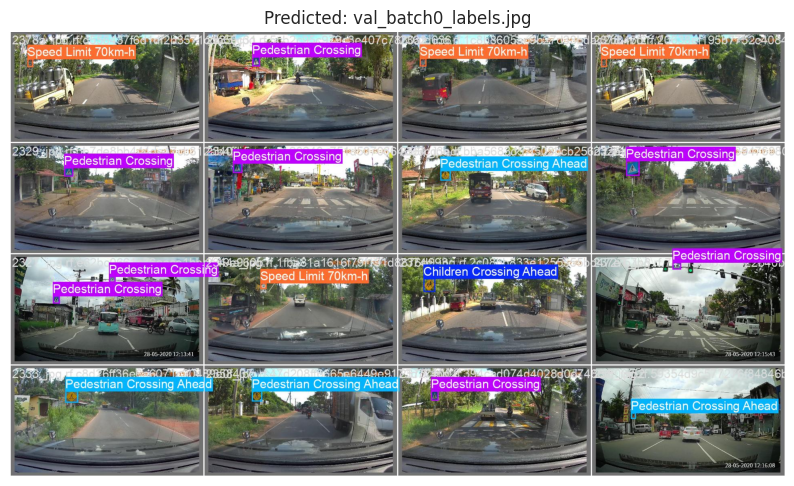

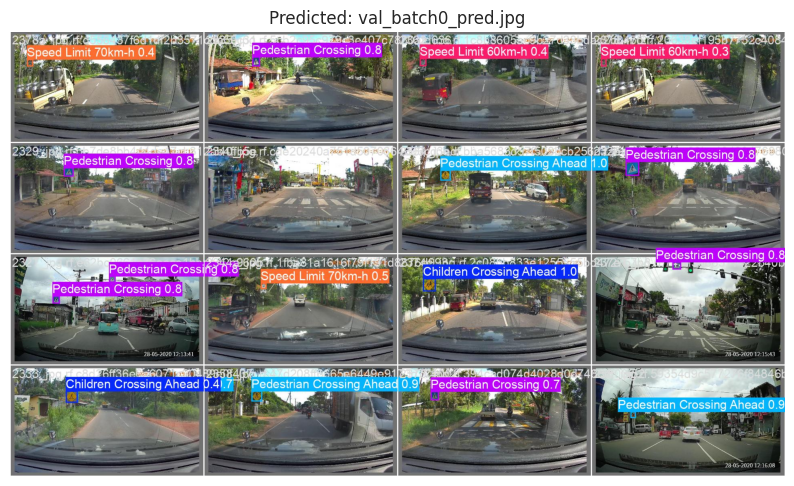

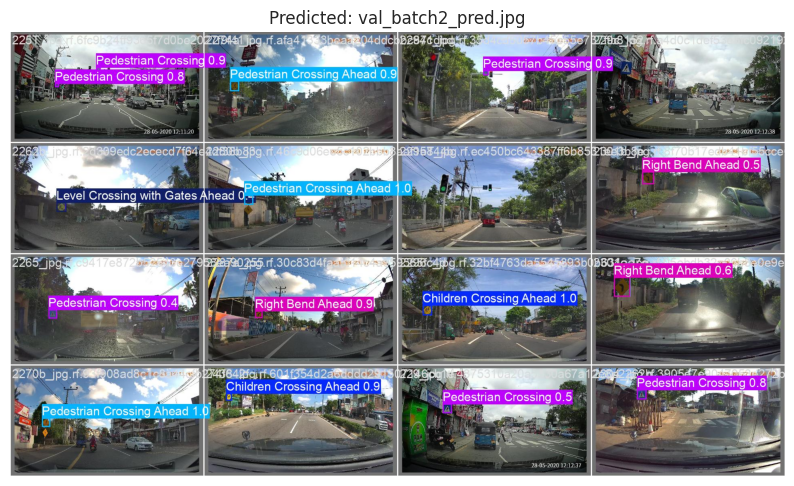

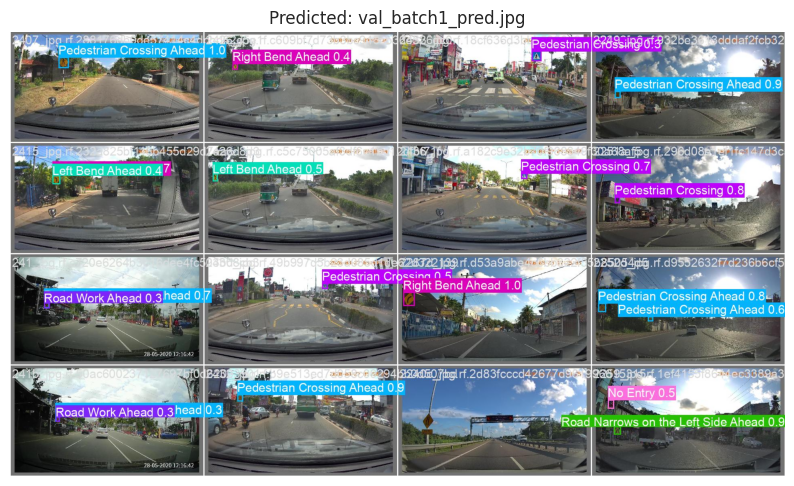

Most recent predictions are in: runs/detect/val3


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import glob

# Dynamically find the most recent YOLO output directory
output_base_dir = "runs/detect"  # Update this base directory if needed
output_dirs = glob.glob(f"{output_base_dir}/val*")  # Get all subdirectories that start with 'val'

if not output_dirs:
    raise FileNotFoundError(f"No YOLO output directories found in: {output_base_dir}")

# Get the most recent output directory
most_recent_dir = max(output_dirs, key=os.path.getmtime)

# Path where the predicted images are saved
predicted_images_path = most_recent_dir

# List all the predicted images (assuming they are .jpg files)
predicted_images = [f for f in os.listdir(predicted_images_path) if f.endswith('.jpg')]

# Display specific images (adjust indices or filenames as needed)
for img_file in predicted_images[:5]:  # Change [:5] to select a specific range
    img_path = os.path.join(predicted_images_path, img_file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {img_file}")
    plt.show()

# Print the path of the most recent folder
print(f"Most recent predictions are in: {most_recent_dir}")


# Test with unseen data and get output with cordinates (cordinates are saved as csv file please check the path)

1. add unseen data to unseen folder in drive

2. then run

3. check the csv file it has cordinates

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/traffic_sign_detection/unseen_data/unSeenImage2.jpeg: 384x640 1 Children Crossing Ahead, 61.8ms
Speed: 1.8ms preprocess, 61.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Predicted image saved to: /content/drive/MyDrive/traffic_sign_detection/undeen_prediction/predicted_image.jpg
Coordinates saved to: /content/drive/MyDrive/traffic_sign_detection/undeen_prediction/detected_coordinates.txt


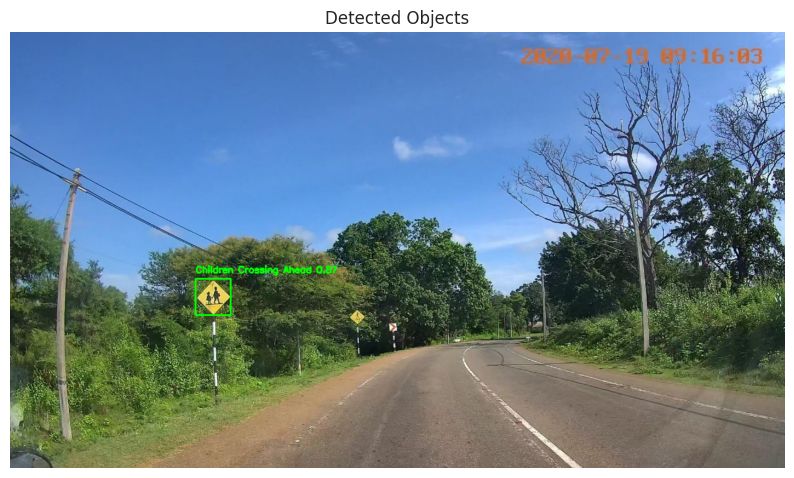

In [ ]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Mount Google Drive (only required once in a notebook)
from google.colab import drive
drive.mount('/content/drive')

# Load your trained YOLO model
model_path = '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt'
model = YOLO(model_path)

# Input image path
input_image_path = "/content/drive/MyDrive/traffic_sign_detection/unseen_data/unSeenImage2.jpeg"  # Replace with the path to your image

# Perform prediction
results = model.predict(source=input_image_path, save=False, conf=0.5)  # Adjust confidence threshold as needed

# Retrieve bounding boxes and class labels
detections = results[0].boxes  # Get bounding box results
detections_list = []

for box in detections:
    coords = box.xyxy[0].tolist()  # Bounding box in [x1, y1, x2, y2] format
    confidence = box.conf[0].item()  # Confidence score
    class_id = int(box.cls[0].item())  # Class ID
    class_name = model.names[class_id]  # Class label

    # Add detection details to list
    detections_list.append({
        "Class": class_name,
        "Confidence": confidence,
        "x1": int(coords[0]),
        "y1": int(coords[1]),
        "x2": int(coords[2]),
        "y2": int(coords[3])
    })

# Define the folder path for saving images and text files in Google Drive
output_folder = '/content/drive/MyDrive/traffic_sign_detection/undeen_prediction'

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the path to save the image and the text file with coordinates
output_image_path = os.path.join(output_folder, 'predicted_image.jpg')
output_txt_path = os.path.join(output_folder, 'detected_coordinates.txt')

# Load and save the image with bounding boxes
image = cv2.imread(input_image_path)
for box in detections:
    coords = box.xyxy[0]
    class_id = int(box.cls[0].item())
    class_name = model.names[class_id]
    confidence = box.conf[0].item()

    # Draw bounding box
    x1, y1, x2, y2 = map(int, coords)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
    cv2.putText(image, f"{class_name} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the image with bounding boxes to Google Drive
cv2.imwrite(output_image_path, image)

# Save the coordinates of the detected objects to a text file
with open(output_txt_path, 'w') as f:
    for detection in detections_list:
        f.write(f"Class: {detection['Class']}\n")
        f.write(f"Confidence: {detection['Confidence']:.2f}\n")
        f.write(f"Coordinates: x1={detection['x1']}, y1={detection['y1']}, x2={detection['x2']}, y2={detection['y2']}\n")
        f.write('\n')

print(f"Predicted image saved to: {output_image_path}")
print(f"Coordinates saved to: {output_txt_path}")

# Optionally, display the image with bounding boxes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Objects")
plt.show()


# Export the model an onnx format

In [ ]:
from ultralytics import YOLO

# Load your trained YOLO model
model_path = '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt'
model = YOLO(model_path)

# Export the model to ONNX format
export_path = "/content/drive/MyDrive/traffic_sign_detection/exported_model.onnx"
model.export(format="onnx", dynamic=True, simplify=True, imgsz=640)  # Export to ONNX
print(f"Model exported to: {export_path}")


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 24, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 193.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 190.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 159.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 154.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.7s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restar

# If model accuracy low then train again using best model

In [ ]:
from ultralytics import YOLO

# Load the pre-trained best.pt model
model = YOLO("/content/drive/MyDrive/traffic_sign_detection/runs/final_model/weights/best.pt")

# Resume training
result = model.train(
    data="/content/drive/MyDrive/traffic_sign_detection/dataset/data.yaml",  # Path to your data.yaml
    epochs=50,  # Adjust based on how many additional epochs you want to train
    batch=16,  # Adjust based on GPU VRAM
    imgsz=640,  # Image size
    optimizer='auto',  # Default optimizer
    lr0=0.001,  # Learning rate, adjust as needed
    patience=10,  # Early stopping patience
    project='/content/drive/MyDrive/traffic_sign_detection/runs',  # Save path
    name='final_model',  # Run name
    augment=True  # Enable data augmentation
)


ModuleNotFoundError: No module named 'ultralytics'